<a href="https://colab.research.google.com/github/sneha5678-cmyk/DYNAMIC-PRICING-AND-PRODUCTS/blob/main/PRODUCT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

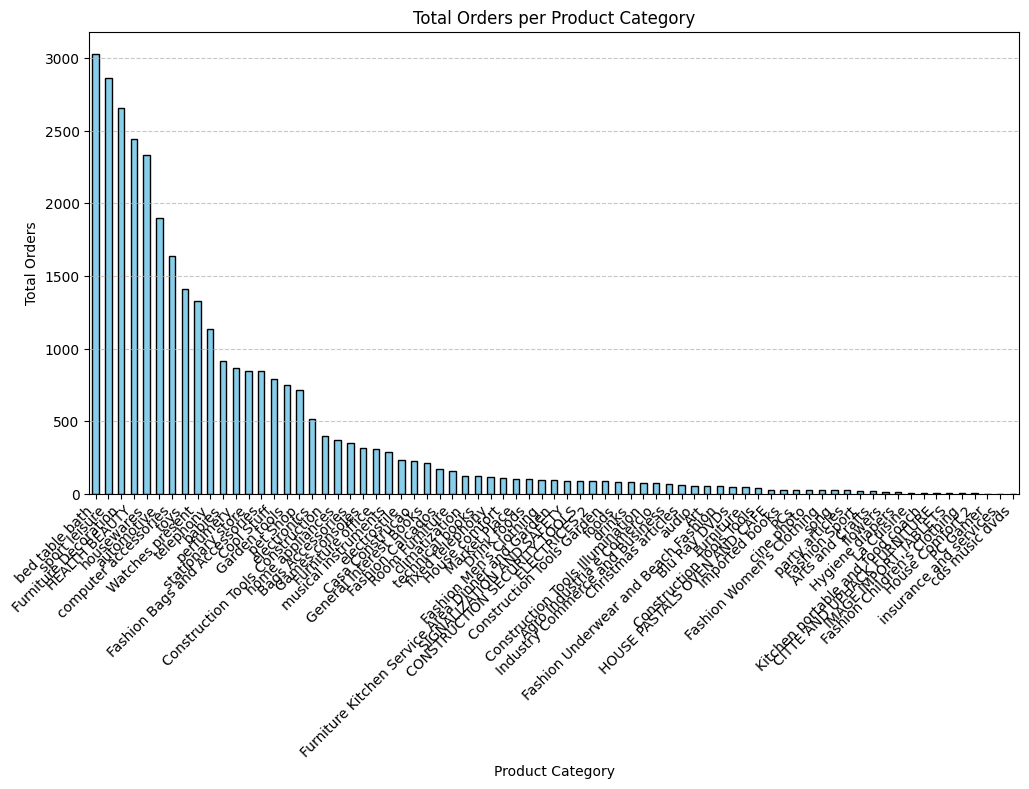

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/products.csv'
df = pd.read_csv(file_path)

# Count the total orders per product category
total_orders = df['product category'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
total_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Orders per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


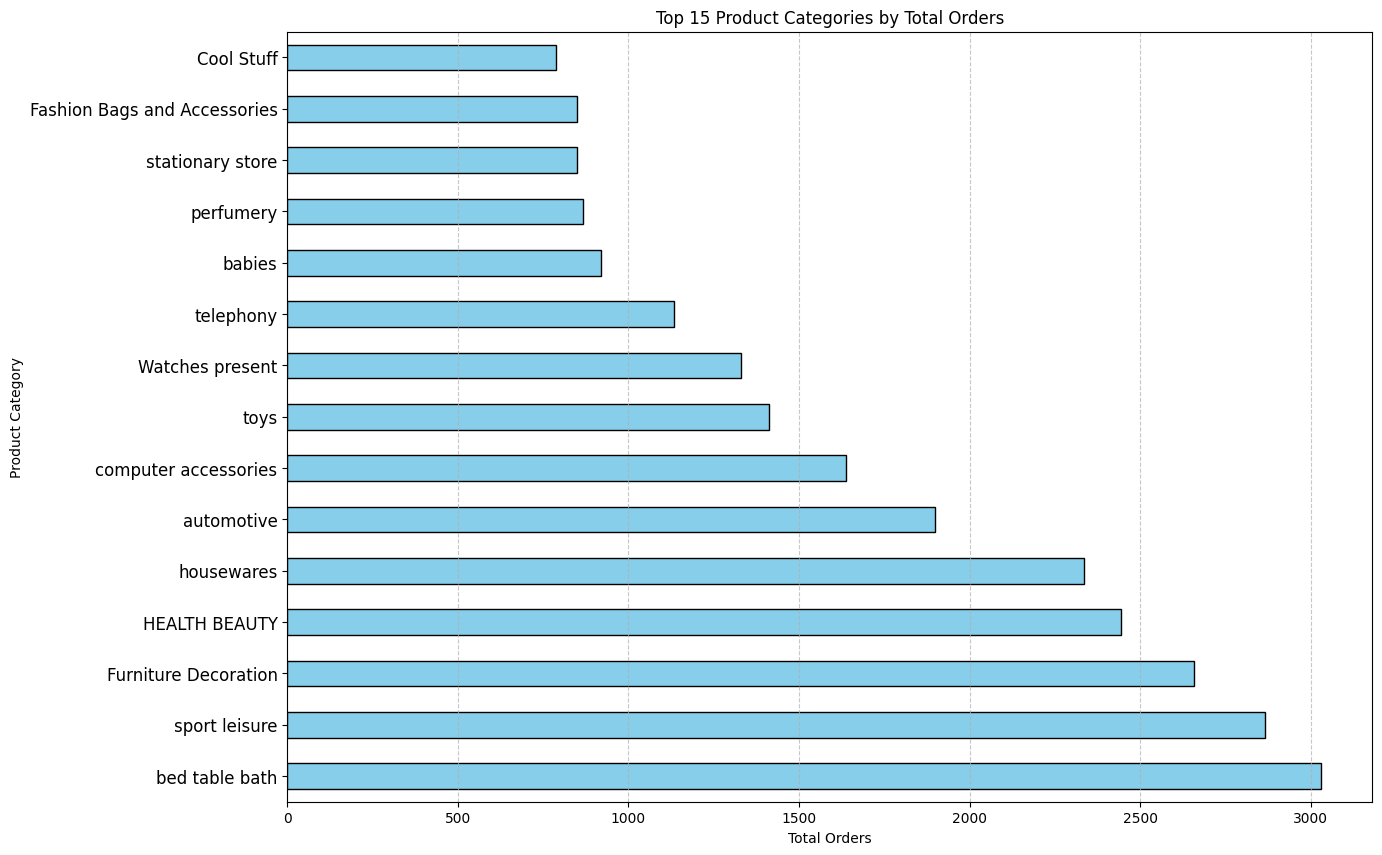

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/products.csv'
df = pd.read_csv(file_path)

# Count the total orders per product category
total_orders = df['product category'].value_counts().head(15)  # Select top 15 categories

# Plot the results
plt.figure(figsize=(14, 10))  # Further increased figure size
total_orders.plot(kind='barh', color='skyblue', edgecolor='black')  # Horizontal bar chart
plt.title('Top 15 Product Categories by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=12)  # Increased font size for better readability
plt.show()

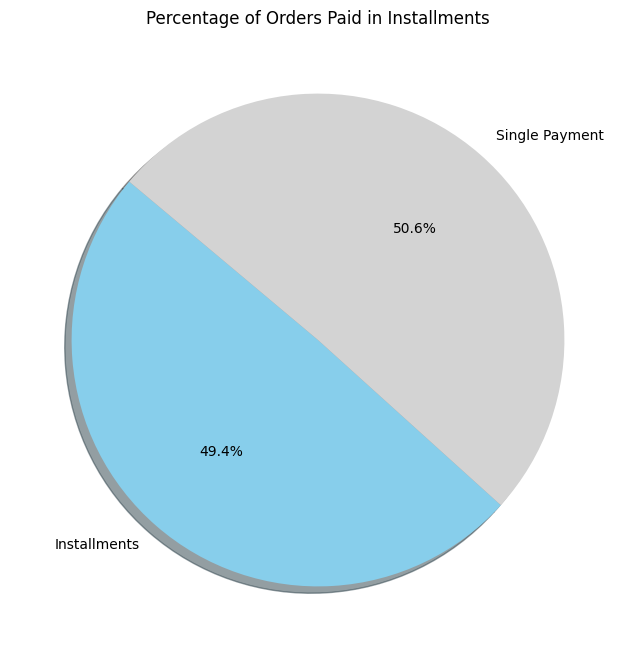

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/payments.csv'
df = pd.read_csv(file_path)

# Determine the percentage of orders paid in installments
installment_orders = df[df['payment_installments'] > 1].shape[0]
total_orders = df.shape[0]
percentage_installments = (installment_orders / total_orders) * 100

# Plot the results
labels = ['Installments', 'Single Payment']
sizes = [percentage_installments, 100 - percentage_installments]
colors = ['skyblue', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
plt.title('Percentage of Orders Paid in Installments')
plt.show()


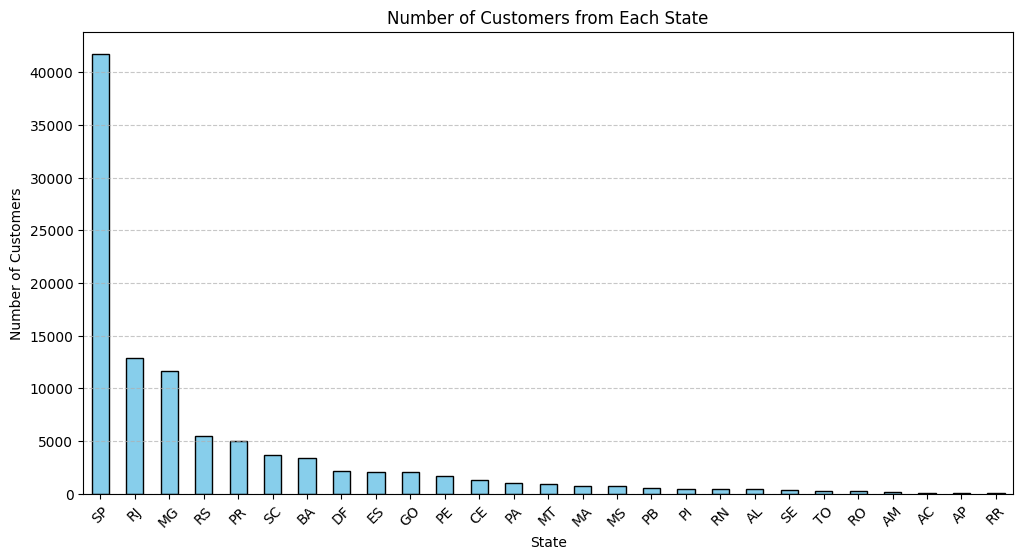

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/customers.csv'
df = pd.read_csv(file_path)

# Count the number of customers from each state
customers_by_state = df['customer_state'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
customers_by_state.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers from Each State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


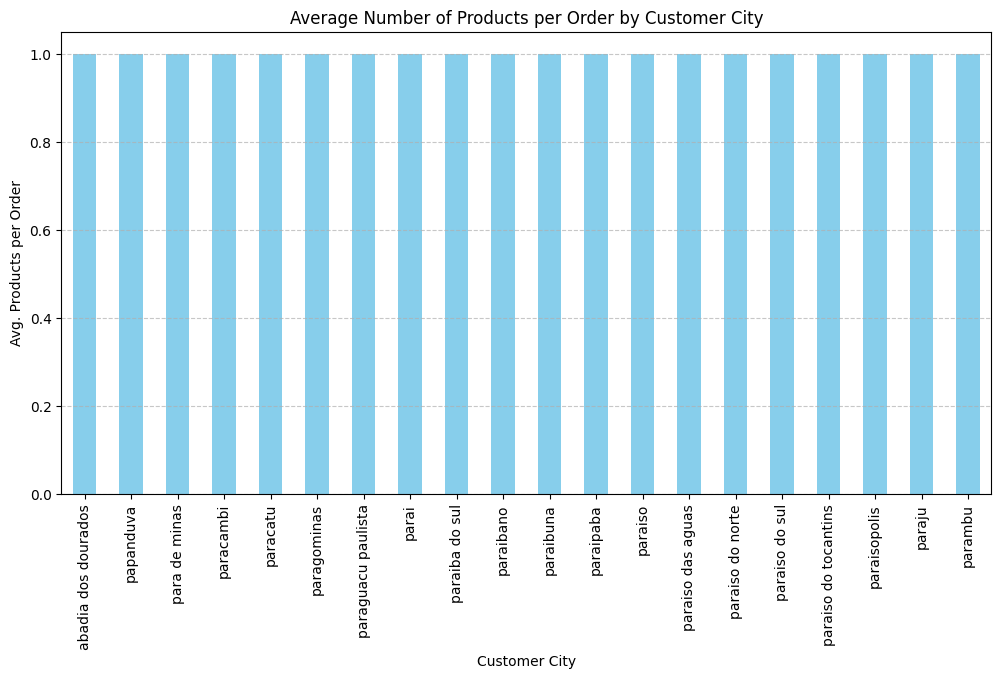

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/orders2.csv'
df = pd.read_csv(file_path)

# Count the number of products per order
order_counts = df.groupby(['customer_id', 'CUSTOMER CITY'])['PRODUCT ID'].count().reset_index()

# Compute the average number of products per order per city
city_avg_products = order_counts.groupby('CUSTOMER CITY')['PRODUCT ID'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
city_avg_products.head(20).plot(kind='bar', color='skyblue')  # Showing top 20 cities
plt.xlabel('Customer City')
plt.ylabel('Avg. Products per Order')
plt.title('Average Number of Products per Order by Customer City')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


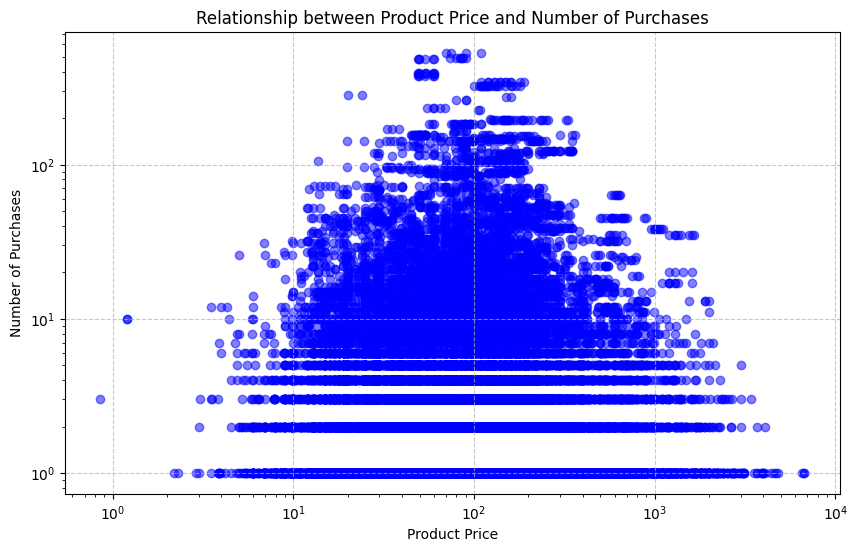

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/order_items.csv'
df = pd.read_csv(file_path)

# Count the number of times each product has been purchased
product_purchase_counts = df['product_id'].value_counts()

# Merge purchase counts with product price
df_product_price = df[['product_id', 'price']].drop_duplicates().set_index('product_id')
df_product_price['purchase_count'] = product_purchase_counts

# Drop NaN values if any (Corrected the typo here)
df_product_price = df_product_price.dropna()

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_product_price['price'], df_product_price['purchase_count'], alpha=0.5, color='blue')
plt.xlabel('Product Price')
plt.ylabel('Number of Purchases')
plt.title('Relationship between Product Price and Number of Purchases')
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale for purchase counts
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-13-1bd386693bca>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df_product_price.groupby('purchase_bin')['price'].mean()


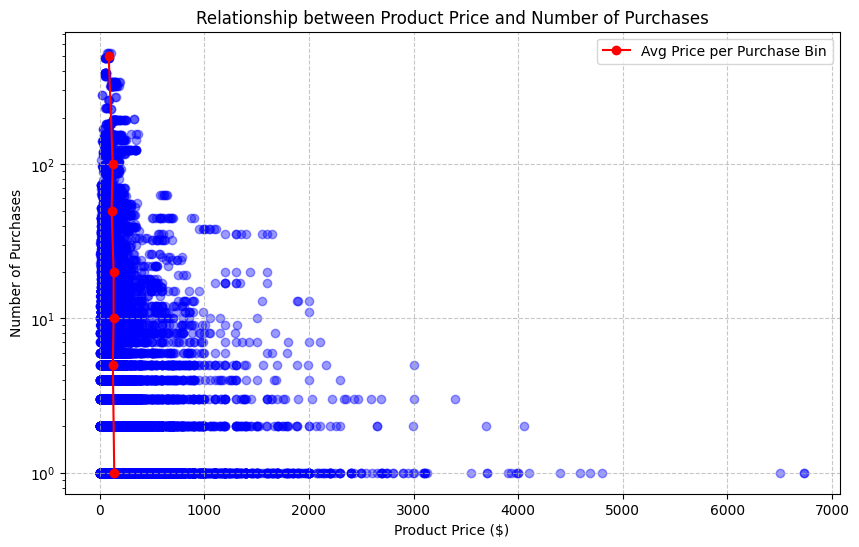

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/content/order_items.csv'
df = pd.read_csv(file_path)

# Count the number of times each product has been purchased
product_purchase_counts = df['product_id'].value_counts()

# Merge purchase counts with product price
df_product_price = df[['product_id', 'price']].drop_duplicates().set_index('product_id')
df_product_price['purchase_count'] = product_purchase_counts

# Drop NaN values if any
df_product_price = df_product_price.dropna()

# Group purchase counts into bins for better visualization
bins = [1, 5, 10, 20, 50, 100, 500, 1000, 5000]  # Larger intervals
df_product_price['purchase_bin'] = pd.cut(df_product_price['purchase_count'], bins, labels=bins[:-1])

# Compute average price per purchase bin
bin_means = df_product_price.groupby('purchase_bin')['price'].mean()

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_product_price['price'], df_product_price['purchase_count'], alpha=0.4, color='blue')
plt.plot(bin_means, bins[:-1], marker='o', linestyle='-', color='red', label="Avg Price per Purchase Bin")

plt.xlabel('Product Price ($)')
plt.ylabel('Number of Purchases')
plt.title('Relationship between Product Price and Number of Purchases')
plt.yscale('log')  # Log scale for purchase counts
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


                             seller_id    revenue  rank
1535  7c67e1448b00f6e969d365cea6b010ab  292489.30     1
1013  53243585a1d6dc2643021fd1853d8905  244941.39     2
857   4869f7a5dfa277a7dca6462dcf3b52b2  235628.51     3
881   4a3ca9315b744ce9f8e9374361493884  226871.72     4
2643  da8622b14eb17ae2831f4ac5b9dab84a  197382.15     5
3024  fa1c13f2614d7b5c4749cbc52fecda94  195603.13     6
192   1025f0e2d44d7041d6cf58b6550e0bfa  190591.27     7
1560  7e93a43ef30c4f03f38b393420bc753a  177904.81     8
1824  955fee9216a65b617aa5c0531780ce60  167045.27     9
368   1f50f920176fa81dab994f9023523100  162414.65    10


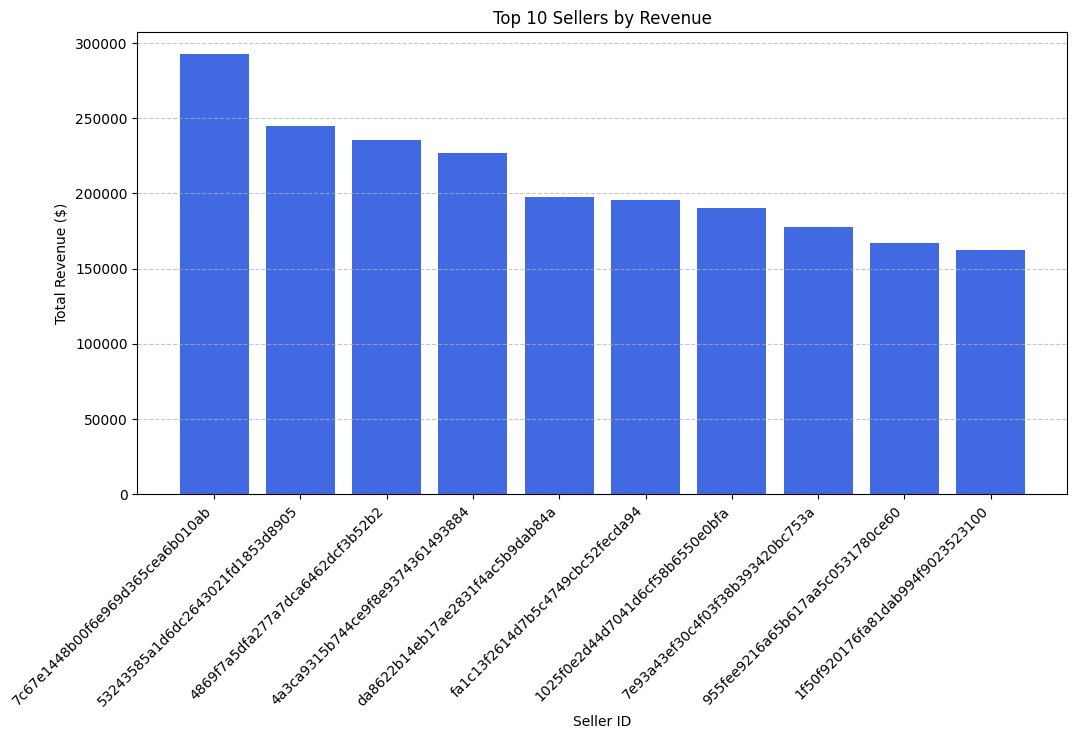

In [14]:
import pandas as pd

# Load dataset
file_path = '/content/order_items.csv'
df = pd.read_csv(file_path)

# Calculate revenue per order item
df['revenue'] = df['price'] * df['order_item_id']

# Aggregate revenue per seller
seller_revenue = df.groupby('seller_id')['revenue'].sum().reset_index()

# Rank sellers by revenue (descending order)
seller_revenue = seller_revenue.sort_values(by='revenue', ascending=False)
seller_revenue['rank'] = range(1, len(seller_revenue) + 1)

# Display the top 10 sellers
top_sellers = seller_revenue.head(10)
print(top_sellers)

# Optional: Visualizing the revenue distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_sellers['seller_id'], top_sellers['revenue'], color='royalblue')
plt.xlabel('Seller ID')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 Sellers by Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


                               order_id                       customer_id  \
68578  5f79b5b0931d63f1a42989eb65b9da6e  00012a2ce6f8dcda20d059ce98491703   
10013  a44895d095d7e0702b6a162fa2dbeced  000161a058600d5901f007fab4c27140   
65884  316a104623542e4d75189bb372bc5f8d  0001fd6190edaaf884bcaf3d49edf079   
43174  5825ce2e88d5346438686b0bba99e5ee  0002414f95344307404f0ace7a26f1d5   
5888   0ab7fb08086d4af9141453c91878ed7a  000379cdec625522490c315e70c7a9fb   
73652  cd3558a10d854487b4f907e9b326a4fc  0004164d20a9e969af783496f3408652   
46156  07f6c3baf9ac86865b60f640c4f923c6  000419c5494106c306a97b5635748086   
59978  8c3d752c5c02227878fae49aeaddbfd7  00046a560d407e99b969756e0b10f282   
79246  fa906f338cee30a984d0945b3832e431  00050bf6e01e69d5c0fd612f1bcfb69c   
80371  9b961b894e797f63622137ff7eb1c1af  000598caf2ef4117407665ac33275130   
834    263ba12390d0fbce329dd16da8cd20f8  0005aefbb696d34b3424dccd0a0e9fd0   
88495  c208db5638f7f1cd04d185856852f864  00062b33cb9f6fe976afdcff967ea74d   

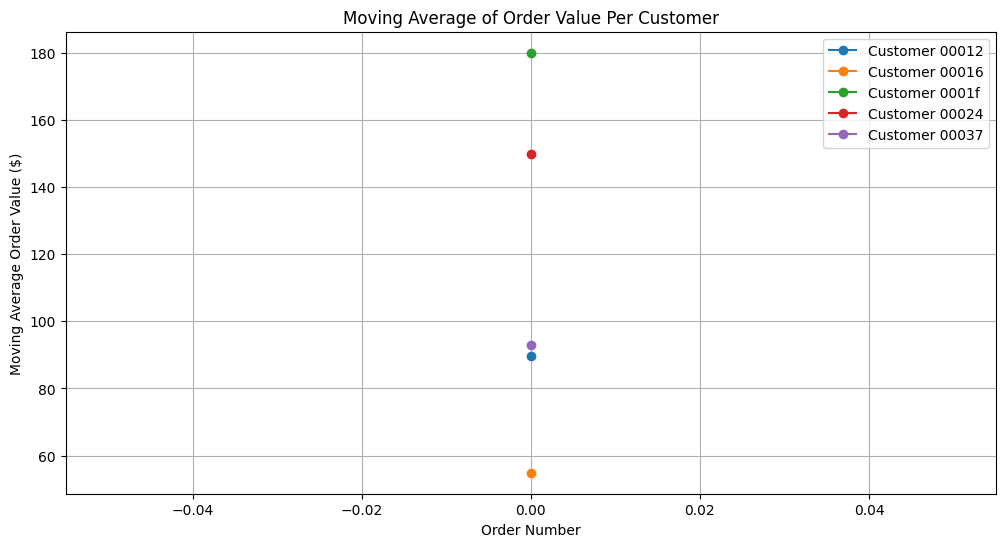

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/ORDER AND ITEMS PRICE.csv'
df = pd.read_csv(file_path)

# Select only required columns
df = df[['order_id', 'customer_id', 'price']]

# Sort data by customer_id and order_id (to ensure order sequence)
df = df.sort_values(by=['customer_id', 'order_id'])

# Compute cumulative moving average order value per customer
df['moving_avg_order_value'] = df.groupby('customer_id')['price'].expanding().mean().reset_index(level=0, drop=True)

# Display sample results
print(df.head(20))

# Visualization for a few customers
sample_customers = df['customer_id'].unique()[:5]  # Select first 5 unique customers
plt.figure(figsize=(12, 6))

for customer in sample_customers:
    subset = df[df['customer_id'] == customer]
    plt.plot(range(len(subset)), subset['moving_avg_order_value'], marker='o', label=f'Customer {customer[:5]}')

plt.xlabel('Order Number')
plt.ylabel('Moving Average Order Value ($)')
plt.title('Moving Average of Order Value Per Customer')
plt.legend()
plt.grid(True)
plt.show()


                               order_id                       customer_id  \
68578  5f79b5b0931d63f1a42989eb65b9da6e  00012a2ce6f8dcda20d059ce98491703   
10013  a44895d095d7e0702b6a162fa2dbeced  000161a058600d5901f007fab4c27140   
65884  316a104623542e4d75189bb372bc5f8d  0001fd6190edaaf884bcaf3d49edf079   
43174  5825ce2e88d5346438686b0bba99e5ee  0002414f95344307404f0ace7a26f1d5   
5888   0ab7fb08086d4af9141453c91878ed7a  000379cdec625522490c315e70c7a9fb   
73652  cd3558a10d854487b4f907e9b326a4fc  0004164d20a9e969af783496f3408652   
46156  07f6c3baf9ac86865b60f640c4f923c6  000419c5494106c306a97b5635748086   
59978  8c3d752c5c02227878fae49aeaddbfd7  00046a560d407e99b969756e0b10f282   
79246  fa906f338cee30a984d0945b3832e431  00050bf6e01e69d5c0fd612f1bcfb69c   
80371  9b961b894e797f63622137ff7eb1c1af  000598caf2ef4117407665ac33275130   
834    263ba12390d0fbce329dd16da8cd20f8  0005aefbb696d34b3424dccd0a0e9fd0   
88495  c208db5638f7f1cd04d185856852f864  00062b33cb9f6fe976afdcff967ea74d   

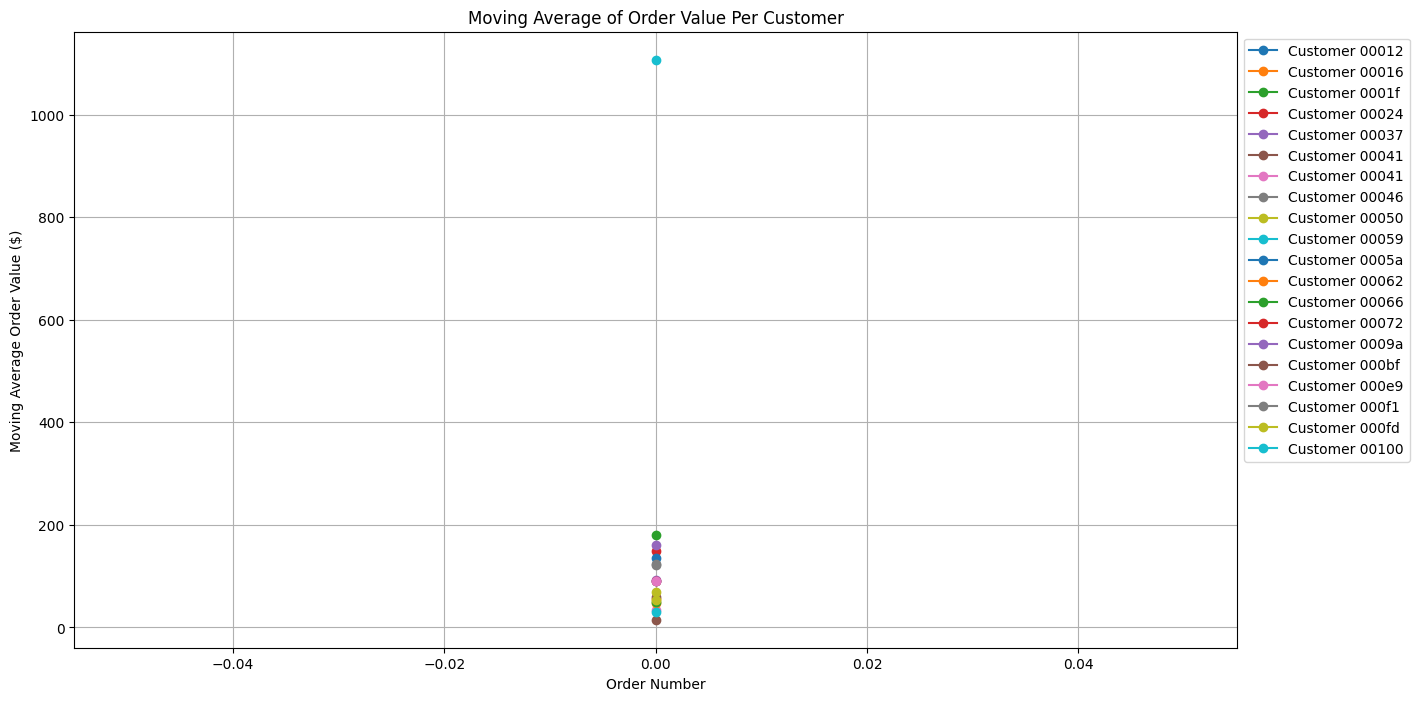

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/ORDER AND ITEMS PRICE.csv'
df = pd.read_csv(file_path)

# Select only required columns
df = df[['order_id', 'customer_id', 'price']]

# Sort data by customer_id and order_id (to ensure order sequence)
df = df.sort_values(by=['customer_id', 'order_id'])

# Compute cumulative moving average order value per customer
df['moving_avg_order_value'] = df.groupby('customer_id')['price'].expanding().mean().reset_index(level=0, drop=True)

# Display sample results
print(df.head(20))

# Visualization for at least 20 customers
sample_customers = df['customer_id'].unique()[:20]  # Select first 20 unique customers
plt.figure(figsize=(15, 8))

for customer in sample_customers:
    subset = df[df['customer_id'] == customer]
    plt.plot(range(len(subset)), subset['moving_avg_order_value'], marker='o', linestyle='-', label=f'Customer {customer[:5]}')

plt.xlabel('Order Number')
plt.ylabel('Moving Average Order Value ($)')
plt.title('Moving Average of Order Value Per Customer')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside plot
plt.grid(True)
plt.show()


In [25]:
import pandas as pd

# Load dataset
file_path = '/content/QUESTION 8.csv'
df = pd.read_csv(file_path, parse_dates=['order_purchase_timestamp'])

# 🔹 **Fix column names: Convert to lowercase and remove spaces**
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ **Check fixed column names**
print("\n🔹 Fixed column names:", df.columns)

# Keep necessary columns and drop missing values
df = df[['customer_id', 'order_id', 'order_purchase_timestamp']].dropna()

# Ensure `customer_id` is a string
df['customer_id'] = df['customer_id'].astype(str)

# Sort data by customer and purchase timestamp
df = df.sort_values(by=['customer_id', 'order_purchase_timestamp'])

# **First and second purchase timestamps per customer**
df_first_purchase = df.groupby('customer_id', as_index=False)['order_purchase_timestamp'].first()

df_second_purchase = df.groupby('customer_id')['order_purchase_timestamp'].nth(1).reset_index()
df_second_purchase.rename(columns={'order_purchase_timestamp': 'order_purchase_timestamp_second'}, inplace=True)

# ✅ **Check if second purchase exists**
if df_second_purchase.empty:
    print("\n⚠️ No second purchases found! Retention rate will be 0%.")
    df_merged = df_first_purchase.copy()
    df_merged['order_purchase_timestamp_second'] = pd.NaT
    df_merged['days_between'] = None
    df_merged['retained'] = 0
else:
    # 🔹 Ensure correct column names before merging
    df_merged = df_first_purchase.merge(df_second_purchase, on='customer_id', how='left')

    # **Calculate days between first and second purchase**
    df_merged['days_between'] = (df_merged['order_purchase_timestamp_second'] - df_merged['order_purchase_timestamp']).dt.days

    # **Mark retained customers (purchased again within 6 months)**
    df_merged['retained'] = df_merged['days_between'].apply(lambda x: 1 if pd.notna(x) and x <= 180 else 0)

# ✅ **Calculate retention rate**
retention_rate = df_merged['retained'].mean() * 100

# 🔥 **Print final result**
print(f"\n✅ Customer Retention Rate (within 6 months): {retention_rate:.2f}%")



🔹 Fixed column names: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_state', 'customer_city', 'product_id', 'product_category',
       'price', 'freight_value'],
      dtype='object')

⚠️ No second purchases found! Retention rate will be 0%.

✅ Customer Retention Rate (within 6 months): 0.00%


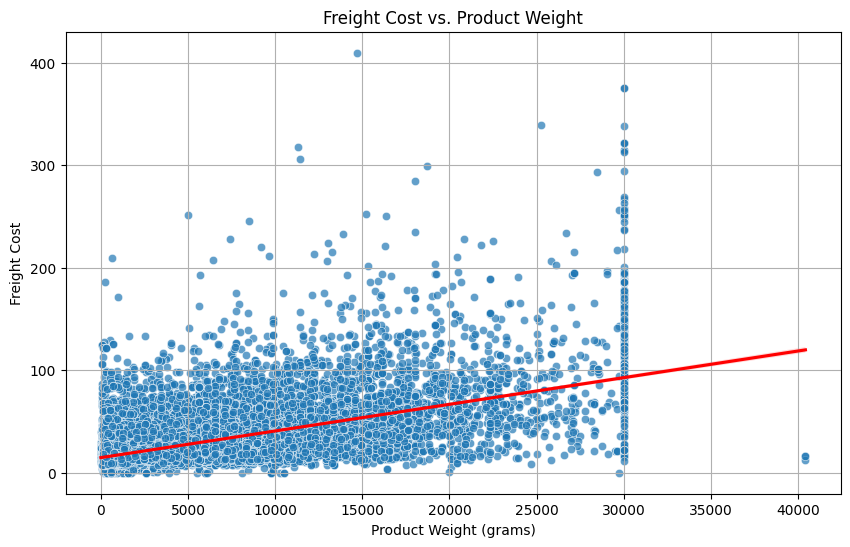

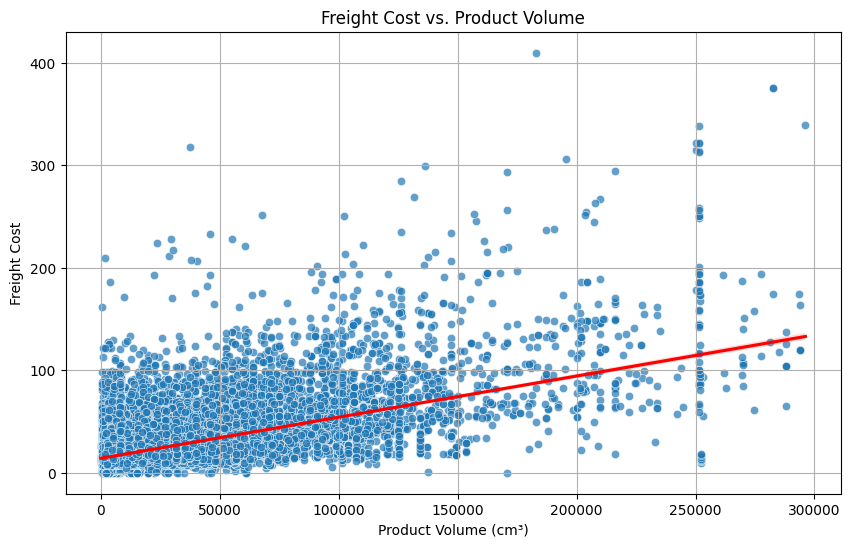

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load the dataset
file_path = '/content/QUESTION 9.xlsx'
df = pd.read_excel(file_path)

# 🔹 Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ Calculate product volume (L × W × H)
df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

# ✅ Convert data types
df['product_weight_g'] = pd.to_numeric(df['product_weight_g'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# 🔹 Scatter Plot: Freight Cost vs. Product Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['product_weight_g'], y=df['freight_value'], alpha=0.7)
sns.regplot(x=df['product_weight_g'], y=df['freight_value'], scatter=False, color='red')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Freight Cost')
plt.title('Freight Cost vs. Product Weight')
plt.grid()
plt.show()

# 🔹 Scatter Plot: Freight Cost vs. Product Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['product_volume_cm3'], y=df['freight_value'], alpha=0.7)
sns.regplot(x=df['product_volume_cm3'], y=df['freight_value'], scatter=False, color='red')
plt.xlabel('Product Volume (cm³)')
plt.ylabel('Freight Cost')
plt.title('Freight Cost vs. Product Volume')
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:          freight_value   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 3.366e+04
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:16:36   Log-Likelihood:            -3.8734e+05
No. Observations:               98666   AIC:                         7.747e+05
Df Residuals:                   98663   BIC:                         7.747e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.8535      0

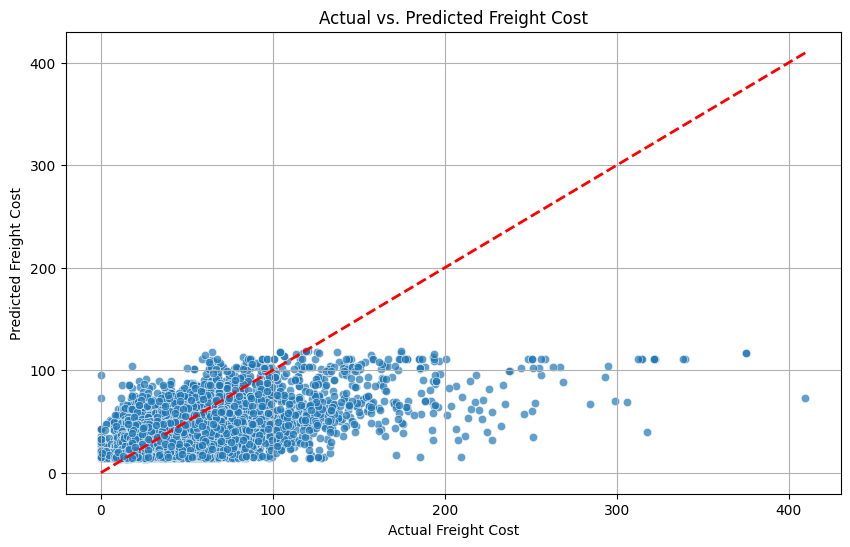

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 🔹 Load the dataset
file_path = '/content/QUESTION 9.xlsx'
df = pd.read_excel(file_path)

# 🔹 Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ Calculate product volume (L × W × H)
df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

# ✅ Convert data types
df['product_weight_g'] = pd.to_numeric(df['product_weight_g'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# 🔹 Drop rows with missing values
df = df.dropna()

# ✅ Define Independent (X) and Dependent (Y) variables
X = df[['product_weight_g', 'product_volume_cm3']]
Y = df['freight_value']

# 🔹 Add constant for OLS regression
X = sm.add_constant(X)

# 🔥 Run the Regression Model
model = sm.OLS(Y, X).fit()

# ✅ Print Regression Summary
print(model.summary())

# 🔹 Scatter Plot: Actual vs. Predicted Freight Cost
df['predicted_freight'] = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['freight_value'], y=df['predicted_freight'], alpha=0.7)
plt.plot([df['freight_value'].min(), df['freight_value'].max()],
         [df['freight_value'].min(), df['freight_value'].max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Freight Cost')
plt.ylabel('Predicted Freight Cost')
plt.title('Actual vs. Predicted Freight Cost')
plt.grid()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


                            OLS Regression Results                            
Dep. Variable:          freight_value   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 3.366e+04
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:19:55   Log-Likelihood:            -3.8734e+05
No. Observations:               98666   AIC:                         7.747e+05
Df Residuals:                   98663   BIC:                         7.747e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.8535      0

/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]



Estimated Causal Effect: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                              
───────────────────(E[freight_value|product_volume_cm3])
d[product_weight_g]                                     
Estimand assumption 1, Unconfoundedness: If U→{product_weight_g} and U→freight_value then P(freight_value|product_weight_g,product_volume_cm3,U) = P(freight_value|product_weight_g,product_volume_cm3)

## Realized estimand
b: freight_value~product_weight_g+product_volume_cm3
Target units: ate

## Estimate
Mean value: 0.0016724188672441187



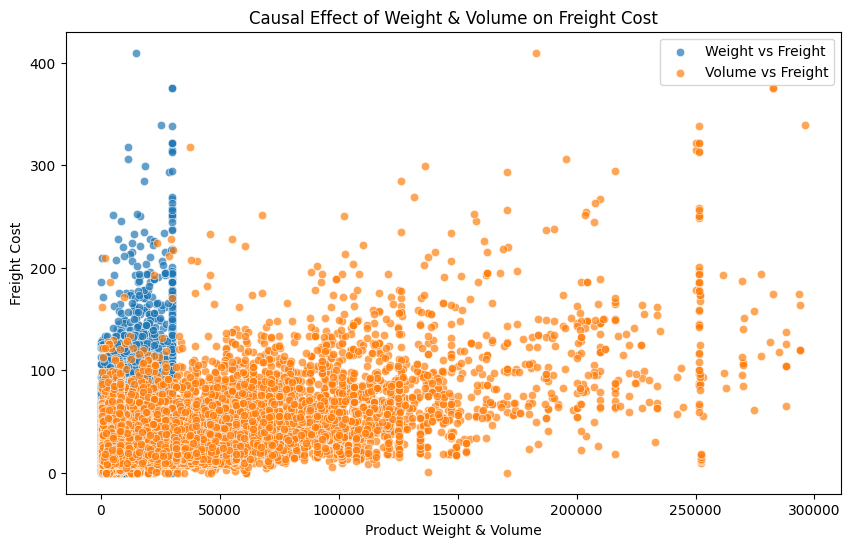

In [29]:
!pip install dowhy
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from dowhy import CausalModel

# 🔹 Load the dataset
file_path = '/content/QUESTION 9.xlsx'
df = pd.read_excel(file_path)

# 🔹 Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ Calculate product volume (L × W × H)
df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

# ✅ Convert to numeric values
df['product_weight_g'] = pd.to_numeric(df['product_weight_g'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# 🔹 Drop missing values
df = df.dropna()

# ✅ Define treatment (X) and outcome (Y)
X = df[['product_weight_g', 'product_volume_cm3']]
Y = df['freight_value']

# 🔹 Add constant for OLS regression
X = sm.add_constant(X)

# 🔥 Run OLS Regression (Baseline Causal Test)
model = sm.OLS(Y, X).fit()
print(model.summary())

# 🔹 **Causal Model Using DoWhy**
causal_model = CausalModel(
    data=df,
    treatment='product_weight_g',
    outcome='freight_value',
    common_causes=['product_volume_cm3']
)

# ✅ Identify causal effect
causal_model.identify_effect()

# 🔥 Estimate causal effect
estimate = causal_model.estimate_effect(identified_estimand=causal_model.identify_effect(), method_name="backdoor.linear_regression")

# ✅ Print causal effect result
print("\nEstimated Causal Effect:", estimate)

# 🔹 Scatter Plot: Freight Cost vs. Product Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['product_weight_g'], y=df['freight_value'], alpha=0.7, label='Weight vs Freight')
sns.scatterplot(x=df['product_volume_cm3'], y=df['freight_value'], alpha=0.7, label='Volume vs Freight')
plt.xlabel('Product Weight & Volume')
plt.ylabel('Freight Cost')
plt.legend()
plt.title('Causal Effect of Weight & Volume on Freight Cost')
plt.show()


📌 Correlation between Delivery Time and Order Count: 0.0396 (p-value: 0.0000)
                            OLS Regression Results                            
Dep. Variable:            order_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           7.32e-35
Time:                        16:28:07   Log-Likelihood:            -5.4131e+05
No. Observations:               96476   AIC:                         1.083e+06
Df Residuals:                   96474   BIC:                         1.083e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

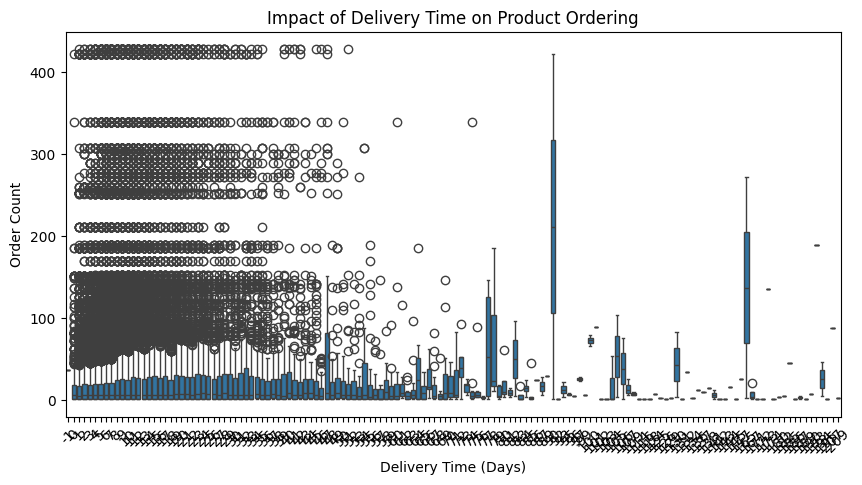

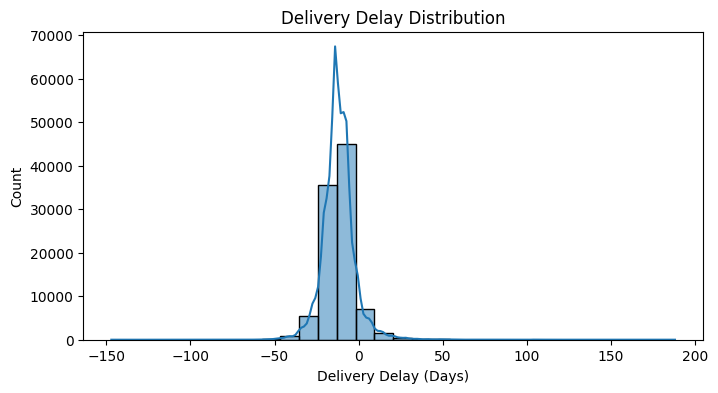

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load dataset
file_path = "/content/QUESTION 8.csv"
df = pd.read_csv(file_path)

# Convert date columns to datetime format with dayfirst=True
date_cols = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)  # ✅ FIXED WARNING

# Drop rows with missing delivery dates
df = df.dropna(subset=["order_delivered_customer_date", "order_estimated_delivery_date"]).copy()

# Compute Actual Delivery Time (Days)
df.loc[:, "actual_delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Compute Delivery Delay (Days) [Negative means early, Positive means late]
df.loc[:, "delivery_delay"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days

# Count how often each product is ordered
product_orders = df["PRODUCT ID"].value_counts().reset_index()
product_orders.columns = ["PRODUCT ID", "order_count"]

# Merge back to main dataset
df = df.merge(product_orders, on="PRODUCT ID", how="left")

# **🔹 Fix NaN Issue in Pearson Correlation**
df_clean = df.dropna(subset=["actual_delivery_time", "order_count"])

# **🔹 Correlation Analysis: Delivery Time vs. Order Count**
corr, p_value = pearsonr(df_clean["actual_delivery_time"], df_clean["order_count"])
print(f"📌 Correlation between Delivery Time and Order Count: {corr:.4f} (p-value: {p_value:.4f})")

# **🔹 Regression Analysis**
X = sm.add_constant(df_clean["actual_delivery_time"])  # Add constant for intercept
y = df_clean["order_count"]
model = sm.OLS(y, X).fit()
print(model.summary())

# **🔹 Visualization: Order Frequency vs. Delivery Time**
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean["actual_delivery_time"], y=df_clean["order_count"])
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Order Count")
plt.title("Impact of Delivery Time on Product Ordering")
plt.xticks(rotation=45)
plt.show()

# **🔹 Visualization: Delivery Delays Distribution**
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["delivery_delay"], bins=30, kde=True)
plt.xlabel("Delivery Delay (Days)")
plt.title("Delivery Delay Distribution")
plt.show()


In [34]:
print(order_items.columns)


Index(['order_id,"order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"'], dtype='object')


In [35]:
order_items.columns = order_items.columns.str.strip()


In [36]:
order_items = pd.read_csv("/content/order_items.csv", delimiter=",")  # or "\t"


In [33]:
print(order_items.head())
print(orders.head())


  order_id,"order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"
0  00010242fe8c5a6d1ba2dd792cb16214,1,"4244733e06...                                             
1  00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802...                                             
2  000229ec398224ef6ca0657da4fc703e,1,c777355d18b...                                             
3  00024acbcdf0a6daa1e931b038114c75,1,"7634da152a...                                             
4  00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068...                                             
  order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,CUSTOMER STATE,CUSTOMER CITY,PRODUCT ID,PRODUCT CATEGORY,price,freight_value
0  e481f51cbdc54678b7cc49136f2d6af7,9ef432eb62512...                                                                                                                   

In [38]:
print(df[["actual_delivery_time", "allowed_shipping_time"]].isnull().sum())
print(df[["actual_delivery_time", "allowed_shipping_time"]].describe())


actual_delivery_time     0
allowed_shipping_time    0
dtype: int64
       actual_delivery_time  allowed_shipping_time
count                   0.0                    0.0
mean                    NaN                    NaN
std                     NaN                    NaN
min                     NaN                    NaN
25%                     NaN                    NaN
50%                     NaN                    NaN
75%                     NaN                    NaN
max                     NaN                    NaN


In [39]:
df_clean = df.dropna(subset=["actual_delivery_time", "allowed_shipping_time"])
print(f"Remaining rows: {df_clean.shape[0]}")


Remaining rows: 0


In [40]:
print("Unique values in actual_delivery_time:", df_clean["actual_delivery_time"].nunique())
print("Unique values in allowed_shipping_time:", df_clean["allowed_shipping_time"].nunique())


Unique values in actual_delivery_time: 0
Unique values in allowed_shipping_time: 0


In [41]:
if df_clean["actual_delivery_time"].nunique() > 1 and df_clean["allowed_shipping_time"].nunique() > 1:
    corr, p_value = pearsonr(df_clean["actual_delivery_time"], df_clean["allowed_shipping_time"])
    print(f"📌 Correlation: {corr:.4f} (p-value: {p_value:.4f})")
else:
    print("⚠️ Not enough variance in data for correlation analysis.")


⚠️ Not enough variance in data for correlation analysis.


Order Items Columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Orders Columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'CUSTOMER STATE', 'CUSTOMER CITY', 'PRODUCT ID', 'PRODUCT CATEGORY',
       'price', 'freight_value'],
      dtype='object')
Remaining rows after NaN removal: 0
⚠️ Not enough variance in data for correlation analysis.


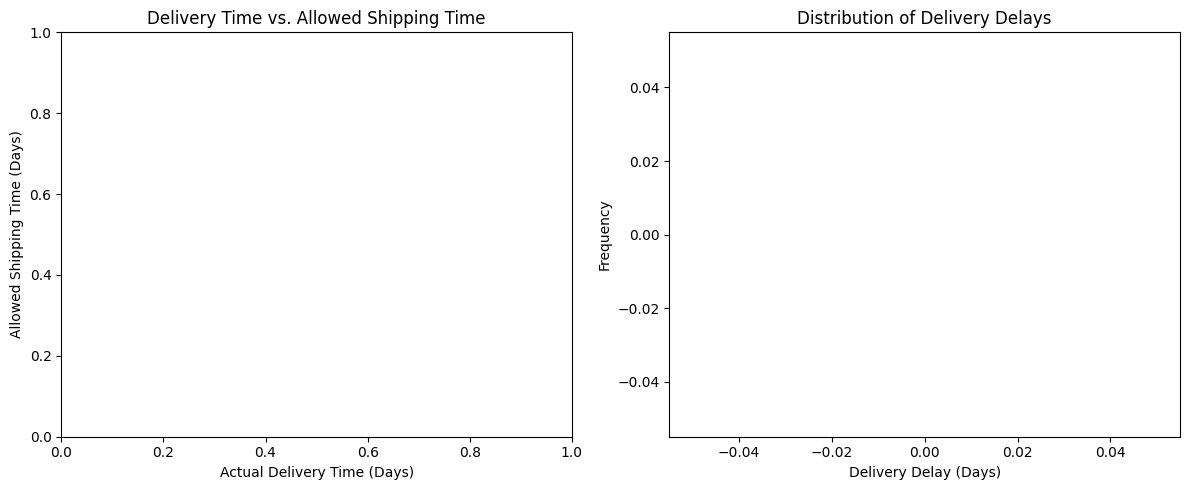

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load datasets
order_items = pd.read_csv("/content/order_items.csv")  # Adjust delimiter if needed
orders = pd.read_csv("/content/QUESTION 8.csv")

# 🔹 Fix column names (remove spaces)
order_items.columns = order_items.columns.str.strip()
orders.columns = orders.columns.str.strip()

# 🔹 Print available columns for debugging
print("Order Items Columns:", order_items.columns)
print("Orders Columns:", orders.columns)

# 🔹 Ensure 'shipping_limit_date' exists
if "shipping_limit_date" not in order_items.columns:
    raise KeyError("❌ 'shipping_limit_date' column not found in order_items.csv!")

# Convert timestamps to datetime
date_cols = ["shipping_limit_date", "order_purchase_timestamp", "order_delivered_customer_date"]
for col in date_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors="coerce", format="%d-%m-%Y %H:%M")
    elif col in order_items.columns:
        order_items[col] = pd.to_datetime(order_items[col], errors="coerce", format="%d-%m-%Y %H:%M")

# Merge datasets on order_id
df = order_items.merge(orders, on="order_id", how="inner")

# Compute actual delivery time (in days)
df["actual_delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Compute allowed shipping time (in days)
df["allowed_shipping_time"] = (df["shipping_limit_date"] - df["order_purchase_timestamp"]).dt.days

# Compute delivery delay (negative means early delivery)
df["delivery_delay"] = (df["order_delivered_customer_date"] - df["shipping_limit_date"]).dt.days

# Drop NaN values before correlation
df_clean = df.dropna(subset=["actual_delivery_time", "allowed_shipping_time"])
print(f"Remaining rows after NaN removal: {df_clean.shape[0]}")

# Check if data has enough variance
if df_clean["actual_delivery_time"].nunique() > 1 and df_clean["allowed_shipping_time"].nunique() > 1:
    corr, p_value = pearsonr(df_clean["actual_delivery_time"], df_clean["allowed_shipping_time"])
    print(f"📌 Correlation: {corr:.4f} (p-value: {p_value:.4f})")
else:
    print("⚠️ Not enough variance in data for correlation analysis.")

# 🚀 Visualization
plt.figure(figsize=(12, 5))

# Scatter plot: Delivery Time vs. Order Count
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean["actual_delivery_time"], y=df_clean["allowed_shipping_time"], alpha=0.5)
plt.xlabel("Actual Delivery Time (Days)")
plt.ylabel("Allowed Shipping Time (Days)")
plt.title("Delivery Time vs. Allowed Shipping Time")

# Histogram: Delivery Delay Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_clean["delivery_delay"], bins=20, kde=True)
plt.xlabel("Delivery Delay (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Delays")

plt.tight_layout()
plt.show()
